### taken from kaggle

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_as_array = np.array(data)

In [6]:
m,n = data_as_array.shape
np.random.shuffle(data_as_array)


validation = data_as_array[:1000].T
Label_eval = validation[0]
Data_eval = validation[1:]
Data_eval = Data_eval / 255.


train = data_as_array[1000:].T
Label_train = train[0]
Data_train = train [1:]
Data_train = Data_train / 255.

In [7]:
Data_train[:,0].shape

(784,)

In [8]:
Label_train.shape

(41000,)

In [9]:
Label_train

array([1, 2, 5, ..., 9, 0, 2])

In [14]:
#build up the functions

def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5

    
    return W1, b1, W2, b2


def ReLU(Z):
    return np.maximum(Z, 0)
    
def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))
    

def forward(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T
    
def deriv_ReLU(Z):
    return Z > 0
    
    
def backwards(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [15]:
def predict(A2):
    return np.argmax(A2, 0)

def get_accuracy(prediction, Y):
    return np.sum(prediction == Y) / Y.size

def gradient_descent(X, Y, epochs, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backwards(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if 200 <= i < 400:
            alpha = 0.15
        if i >= 400:
            alpha = 0.1
        if i >= 600:
            alpha = 0.08
        if i % 20 == 0:
            print(f"epoch: {i} accuracy: {get_accuracy(predict(A2), Y)} lr: {alpha}")
    return W1, b1, W2, b2     

In [16]:
W1, b1, W2, b2 = gradient_descent(Data_train, Label_train, 800, 0.2)

epoch: 0 accuracy: 0.10897560975609756 lr: 0.2
epoch: 20 accuracy: 0.4268780487804878 lr: 0.2
epoch: 40 accuracy: 0.5895853658536585 lr: 0.2
epoch: 60 accuracy: 0.6644878048780488 lr: 0.2
epoch: 80 accuracy: 0.7103414634146341 lr: 0.2
epoch: 100 accuracy: 0.7412195121951219 lr: 0.2
epoch: 120 accuracy: 0.7635365853658537 lr: 0.2
epoch: 140 accuracy: 0.7809512195121951 lr: 0.2
epoch: 160 accuracy: 0.7924146341463415 lr: 0.2
epoch: 180 accuracy: 0.7897317073170732 lr: 0.2
epoch: 200 accuracy: 0.8146585365853658 lr: 0.15
epoch: 220 accuracy: 0.8242195121951219 lr: 0.15
epoch: 240 accuracy: 0.8299756097560975 lr: 0.15
epoch: 260 accuracy: 0.835780487804878 lr: 0.15
epoch: 280 accuracy: 0.8404146341463414 lr: 0.15
epoch: 300 accuracy: 0.8448536585365853 lr: 0.15
epoch: 320 accuracy: 0.8484634146341463 lr: 0.15
epoch: 340 accuracy: 0.8519024390243902 lr: 0.15
epoch: 360 accuracy: 0.8554634146341463 lr: 0.15
epoch: 380 accuracy: 0.8581707317073171 lr: 0.15
epoch: 400 accuracy: 0.8614634146341

In [17]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward(W1, b1, W2, b2, X)
    predictions = predict(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = Data_train[:, index, None]
    prediction = make_predictions(Data_train[:, index, None], W1, b1, W2, b2)
    label = Label_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


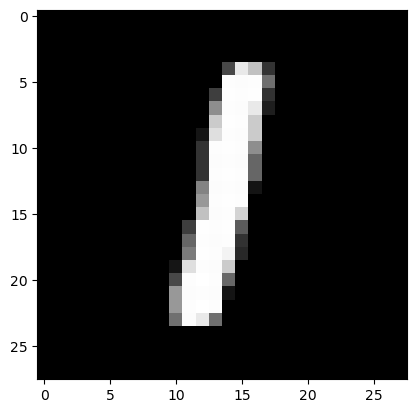

Prediction:  [4]
Label:  2


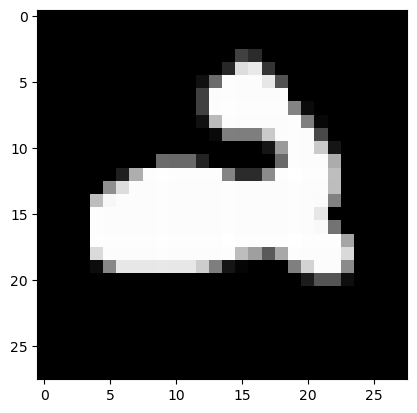

Prediction:  [5]
Label:  5


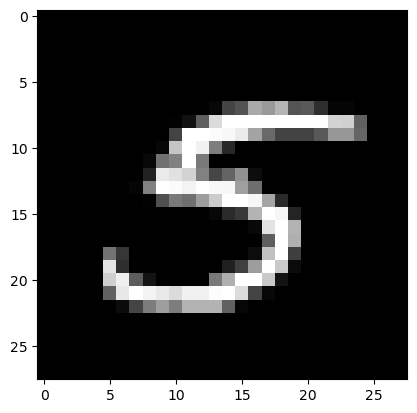

Prediction:  [0]
Label:  0


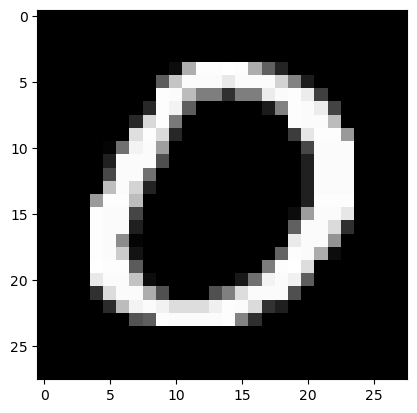

In [18]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [19]:
dev_predictions = make_predictions(Data_eval, W1, b1, W2, b2)
get_accuracy(dev_predictions, Label_eval)

0.88